In [ ]:
class Node:
  def __init__(self, value=None):
    self.depth = 0
    self.children = []
    self.value = value

  def add_child(self, child):
    child.depth = self.depth + 1
    self.children.append(child)


def print_tree(node, level=0):
  if node:
    print("\t" * level + str(node.value))
    for child in node.children:
      print_tree(child, level + 1)


n0 = Node() #max
n1 = Node() #min
n2 = Node() #min
n3 = Node() #min
n4 = Node(3)
n5 = Node(12)
n6 = Node(8)
n7 = Node(2)
n8 = Node(-5)
n9 = Node(1)
n10 = Node(14)
n11 = Node(5)
n12 = Node(2)

n0.add_child(n1)
n0.add_child(n2)
n0.add_child(n3)
n1.add_child(n4)
n1.add_child(n5)
n1.add_child(n6)
n2.add_child(n7)
n2.add_child(n8)
n2.add_child(n9)
n3.add_child(n10)
n3.add_child(n11)
n3.add_child(n12)

print_tree(n0)

None
	None
		3
		12
		8
	None
		2
		-5
		1
	None
		14
		5
		2


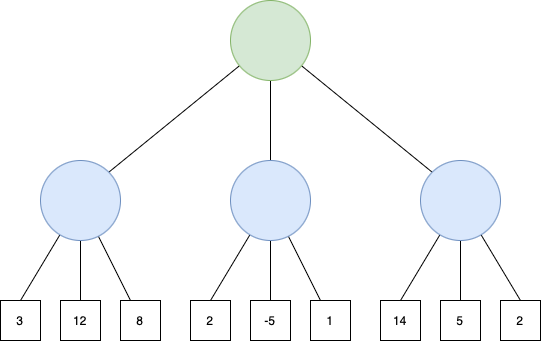

## Minimax


In [ ]:
import math

def minimax(node, maximizingPlayer):
  minimax.counter += 1
  if len(node.children) == 0 or (node.depth == 0 and node.value):
    return node.value

  if maximizingPlayer:
    v = -math.inf
    for child in node.children:
      v = max(v, minimax(child, False))
    return v
  else:
    v = math.inf
    for child in node.children:
      v = min(v, minimax(child, True))
    return v

minimax.counter = 0
# Time complexity: O(b^m)
# Space Complexity: O(bm)
#b: branching factor
#m: profondità dell'albero

print("Valore minimax:", minimax(n0, True))
print("Function called {} times".format(minimax.counter))

Valore minimax: 3
Function called 13 times


## Alpha-Beta pruning

In [ ]:
alpha, beta = -math.inf, math.inf

def abminimax(maximizingPlayer, node, alpha, beta):
  abminimax.counter += 1
  if len(node.children) == 0 or (node.depth == 0 and node.value):
    return node.value

  if maximizingPlayer:

    v = -math.inf

    for child in node.children:
      v = max(v, abminimax(
                False,
                child,
                alpha,
                beta)
      )
      if v > beta:
        break

      alpha = max(alpha, v)
    return v

  else:
    v = math.inf

    for child in node.children:
      v = min(v, abminimax(
                True, child, alpha, beta))
      if v < alpha:
        break

      beta = min(beta, v)
    return v

abminimax.counter = 0
print("The optimal value is :", abminimax(True, n0, alpha, beta))
print("Function called {} times".format(abminimax.counter))
# Time complexity: O(b^m) o O(b^(m/2))

The optimal value is : 3
Function called 11 times


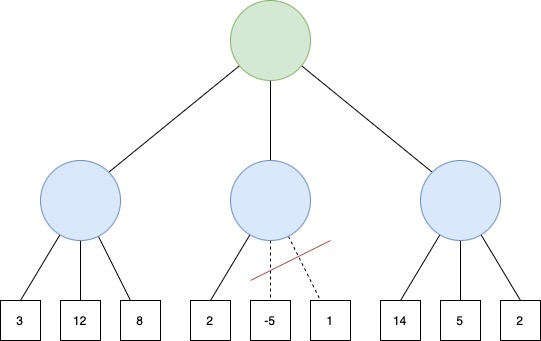

# Genetic algorithm

In [ ]:
import random

random.seed(2) #2: bad; 5:good

POPULATION_SIZE = 100
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ 1234567890'''
TARGET = "30L a tutti"
MAX_STEP = 50

class Individual(object):
	def __init__(self, chromosome):
		self.chromosome = chromosome
		self.fitness = self.cal_fitness()

	@classmethod
	def mutated_genes(self):
		global GENES
		gene = random.choice(GENES)
		return gene

	@classmethod
	def create_gnome(self):
		global TARGET
		gnome_len = len(TARGET)
		return [self.mutated_genes() for _ in range(gnome_len)]

	def mate(self, par2):
		child_chromosome = []
		for gp1, gp2 in zip(self.chromosome, par2.chromosome):

			prob = random.random()

			if prob < 0.45:
				child_chromosome.append(gp1)
			elif prob < 0.90:
				child_chromosome.append(gp2)
			else:
				child_chromosome.append(self.mutated_genes())

		return Individual(child_chromosome)

	def cal_fitness(self):
		#Fitness score - differenza con la stringa TARGET
		global TARGET
		fitness = 0
		for gs, gt in zip(self.chromosome, TARGET):
			if gs == gt: fitness+= 1
		return fitness

generation = 1
found = False
population = []

for _ in range(POPULATION_SIZE):
      gnome = Individual.create_gnome()
      population.append(Individual(gnome))

while not found:

	population = sorted(population, key = lambda x:x.fitness, reverse=True)

	if population[0].fitness >= len(TARGET):
		found = True
		break
	elif generation >= MAX_STEP:
		break

	new_generation = []
  #ELITISM (il 10% migliore della popolazione viene direttamente portato nella successiva)
	e = int((10*POPULATION_SIZE)/100)
	new_generation.extend(population[:e])

	#CULLING (si elimina il 10% della popolazione con fitness minore)
	c = POPULATION_SIZE-int((10*POPULATION_SIZE)/100)
	population = population[:c]

	s = int((90*POPULATION_SIZE)/100)
	for _ in range(s):
    #parent1, parent2 = random.choices(population[:50], k=2) #SELECTION WITH TRUNCATION
		weights = [chromosome.fitness for chromosome in population]
		parent1, parent2 = random.choices(population, weights=weights, k=2) #Roulette wheel SELECTION
		child = parent1.mate(parent2) #CROSSOVER AND MUTATION
		new_generation.append(child)

	population = new_generation

	print("Generation: {}\tString: {}\tFitness: {}".format(generation,"".join(population[0].chromosome),population[0].fitness), found)

	generation += 1


print("Generation: {}\tString: {}\tFitness: {}".format(generation,
  "".join(population[0].chromosome),
  population[0].fitness), found)

Generation: 1	String: IT6teq utvP	Fitness: 2 False
Generation: 2	String: ITLwx0 utki	Fitness: 4 False
Generation: 3	String: ITLwx0 utki	Fitness: 4 False
Generation: 4	String: ITLwx0 utki	Fitness: 4 False
Generation: 5	String: d0R agextQi	Fitness: 5 False
Generation: 6	String: d0R agextQi	Fitness: 5 False
Generation: 7	String: d0R agextQi	Fitness: 5 False
Generation: 8	String: 30LwxRNutpi	Fitness: 6 False
Generation: 9	String: 30L aXyBtEi	Fitness: 7 False
Generation: 10	String: 30L aXyBtEi	Fitness: 7 False
Generation: 11	String: 36L agNutti	Fitness: 8 False
Generation: 12	String: 36L agNutti	Fitness: 8 False
Generation: 13	String: 36L agNutti	Fitness: 8 False
Generation: 14	String: 30L aRAutti	Fitness: 9 False
Generation: 15	String: 30L aRAutti	Fitness: 9 False
Generation: 16	String: 30L aRAutti	Fitness: 9 False
Generation: 17	String: 30L aRAutti	Fitness: 9 False
Generation: 18	String: 30L aRAutti	Fitness: 9 False
Generation: 19	String: 30L aRAutti	Fitness: 9 False
Generation: 20	String